<a href="https://colab.research.google.com/github/yoonhyeyoon/DeepLearning/blob/main/Image_Classification_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Category

Fully Connected Layer (Dense)를 활용한 이미지 분류 (Image Classification)

## 문제

CIFAR10 데이터 셋에 대한 분류기 생성 (컬러 사진)
테스트는 10 개의 클래스를 분류 할 것으로 예상합니다.

입력 모양은 32 X 32의 컬러사진 (3채널) 로 구성되어 있습니다.

------------------------------------

## STEP 1. import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint


## STEP 2. 전처리 (pre-processing)


[tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

**cifar**: cifar10 데이터셋을 활용하며 다음과 같이 구성되어 있다.

* airplane : 0
* automobile : 1
* bird : 2
* cat : 3
* deer : 4
* dog : 5
* frog : 6
* horse : 7
* ship : 8
* truck : 9


데이터 셋 **로드**  (mnist)

[코드]

In [ ]:
cifar10 = tf.keras.datasets.cifar10

데이터 셋 로드: 
* **cifar10.load_data()**

데이터 셋을 불러와, train / validation 세트를 구성

[코드] 

In [ ]:
(x_train, y_train), (x_valid, y_valid) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


정상적으로 로드되었는지, **확인**

In [ ]:
x_train.shape, x_valid.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
y_train.shape, y_valid.shape

((50000, 1), (10000, 1))

**데이터셋 시각화**

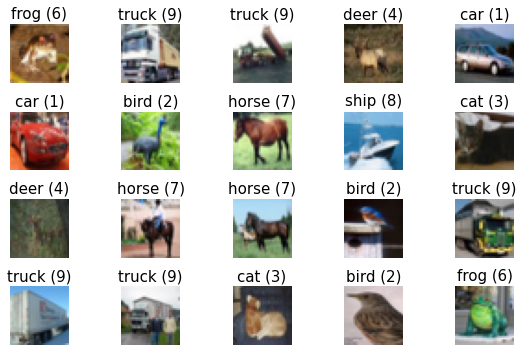

In [ ]:
data_label = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig, axes = plt.subplots(4, 5)
fig.set_size_inches(8, 5)

for i in range(20):
    axes[i//5, i%5].imshow(x_train[i], cmap='gray')
    axes[i//5, i%5].set_title('%s (%d)' % (data_label[int(y_train[i])], y_train[i]), fontsize=15)
    plt.setp( axes[i//5, i%5].get_xticklabels(), visible=False)
    plt.setp( axes[i//5, i%5].get_yticklabels(), visible=False)
    axes[i//5, i%5].axis('off')

plt.tight_layout()
plt.show()

* airplane : 0
* automobile : 1
* bird : 2
* cat : 3
* deer : 4
* dog : 5
* frog : 6
* horse : 7
* ship : 8
* truck : 9


**이미지 정규화 (Normalization)**


In [ ]:
x_train.min(), x_train.max()

(0, 255)

In [ ]:
x_train = x_train / 255
x_valid = x_valid / 255

정규화 후 최소값/최대값 확인

In [ ]:
x_train.min(), x_train.max()

(0.0, 1.0)

## STEP 3. 모델 정의 (Sequential)

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(600, activation='relu'),
    Dense(280, activation='relu'),
    Dense(130, activation='relu'),
    Dense(50, activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 600)               1843800   
_________________________________________________________________
dense_37 (Dense)             (None, 280)               168280    
_________________________________________________________________
dense_38 (Dense)             (None, 130)               36530     
_________________________________________________________________
dense_39 (Dense)             (None, 50)                6550      
Total params: 2,055,160
Trainable params: 2,055,160
Non-trainable params: 0
_________________________________________________________________


## STEP 4. 컴파일 (compile)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

## STEP 5. ModelCheckpoint

[코드]

In [ ]:
checkpoint_path = "my_checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='val_loss',
                             verbose=1)

## STEP 6. 학습 (fit)

[코드]

In [ ]:
history = model.fit(x_train, y_train,
                    validation_data=(x_valid, y_valid),
                    epochs=20,
                    callbacks=[checkpoint],
                    )

Epoch 1/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8793 - acc: 0.3211 - val_loss: 1.7165 - val_acc: 0.3891

Epoch 00001: val_loss improved from inf to 1.71653, saving model to my_checkpoint.ckpt
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6771 - acc: 0.4013 - val_loss: 1.6254 - val_acc: 0.4200

Epoch 00002: val_loss improved from 1.71653 to 1.62537, saving model to my_checkpoint.ckpt
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5946 - acc: 0.4263 - val_loss: 1.6048 - val_acc: 0.4198

Epoch 00003: val_loss improved from 1.62537 to 1.60483, saving model to my_checkpoint.ckpt
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5387 - acc: 0.4498 - val_loss: 1.5030 - val_acc: 0.4689

Epoch 00004: val_loss improved from 1.60483 to 1.50300, saving model to my_checkpoint.ckpt
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4949 - acc: 0.4666 - v

## STEP 7. 학습 완료 후 Load Weights (ModelCheckpoint)

In [ ]:
model.load_weights(checkpoint_path)

## STEP 8. 최종 성능 확인

*   항목 추가
*   항목 추가



In [ ]:
model.evaluate(x_valid, y_valid)

313/313 [==============================] - 1s 2ms/step - loss: 1.4570 - acc: 0.4941


[1.4569828510284424, 0.49410000443458557]

## STEP 9. 결과 시각화

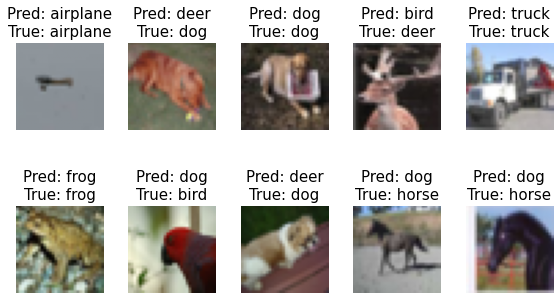

In [ ]:
data_label = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig, axes = plt.subplots(2, 5)
fig.set_size_inches(8, 5)

sample = np.random.choice(x_valid.shape[0], 10)
sample_predictions = model.predict(x_valid[sample])
best_indexes = np.argsort(-sample_predictions, axis=1)[:, :3]
best_indexes[:, 0]

for i, idx in enumerate(sample):
    axes[i//5, i%5].imshow(x_valid[idx], cmap='gray')
    axes[i//5, i%5].set_title('Pred: %s\nTrue: %s' % (data_label[int(best_indexes[i, 0])], data_label[int(y_valid[idx])]), fontsize=15)
    plt.setp( axes[i//5, i%5].get_xticklabels(), visible=False)
    plt.setp( axes[i//5, i%5].get_yticklabels(), visible=False)
    axes[i//5, i%5].axis('off')

plt.tight_layout()
plt.show()